## RANDOM FOREST

**BOSQUES ALEATORIOS**

La idea principal detrás de los bosques aleatorios es construir múltiples árboles de decisión durante el entrenamiento y combinar sus predicciones para obtener una predicción final. Cada árbol en el bosque se entrena de forma independiente utilizando un subconjunto aleatorio de características y datos de entrenamiento. Luego, para hacer una predicción, se realiza una votación entre todos los árboles del bosque y se selecciona la clase más común en el caso de clasificación, o se calcula la media en el caso de regresión.

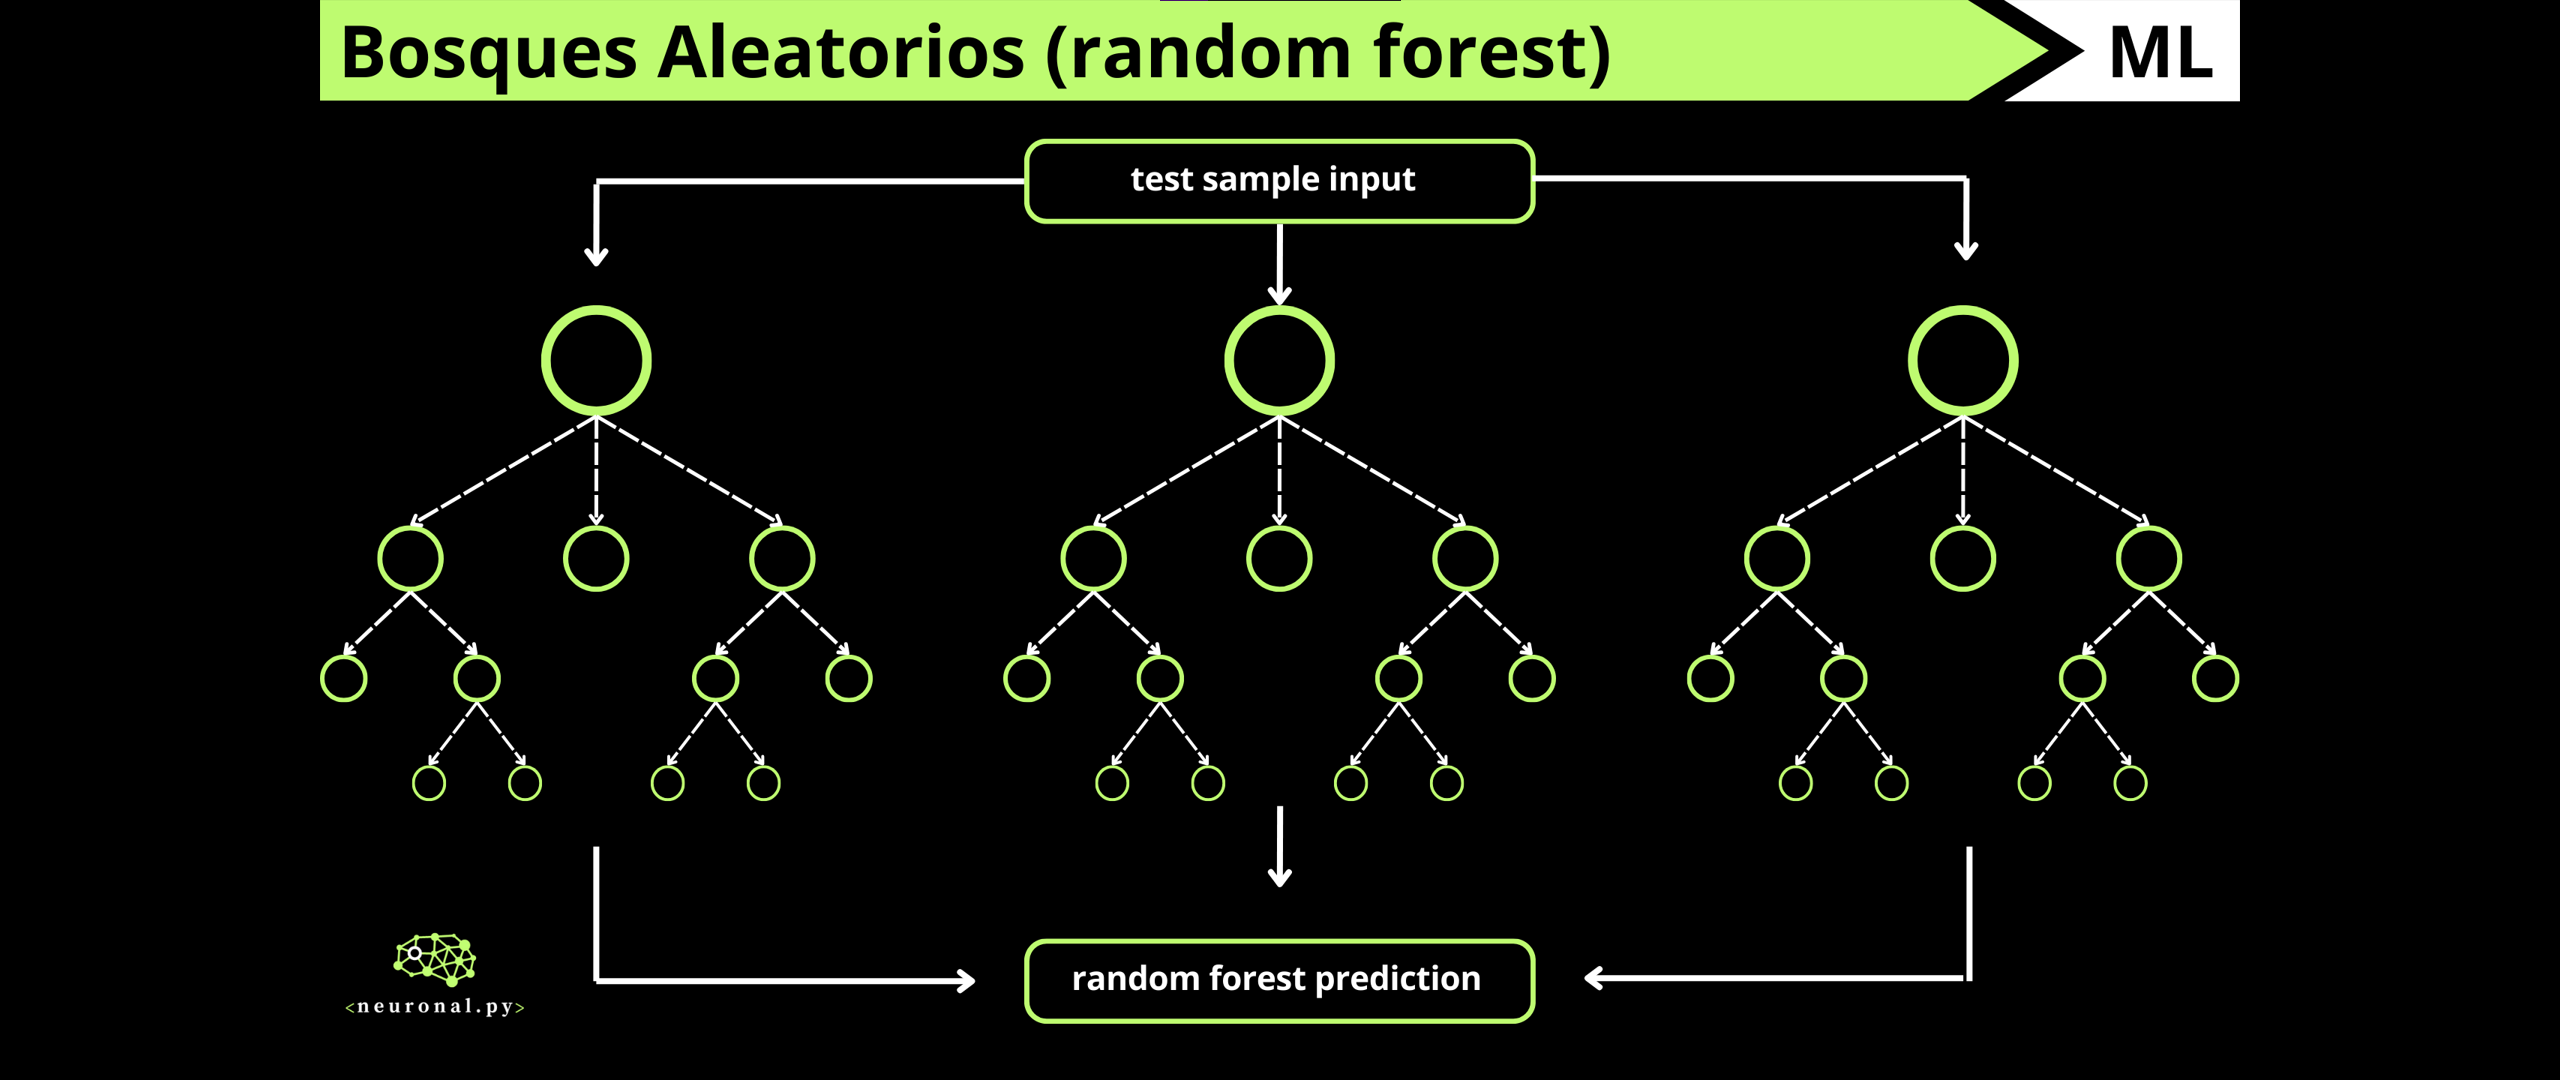

**Los bosques aleatorios tienen varias ventajas:**

Son robustos frente al sobreajuste, ya que la combinación de múltiples árboles ayuda a reducir el impacto del ruido y la variabilidad en los datos.
Pueden manejar conjuntos de datos grandes con muchas características y observaciones.
No requieren mucha afinación de hiperparámetros y son relativamente fáciles de usar.

**IMPORTAMOS LIBRERIAS**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

**DEFINIMOS NUESTRO DATASETS Y MOTRAMOS INFORMACIÓN**

In [3]:
diamonds = seaborn.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
diamonds['clarity'].unique(), diamonds['color'].unique()

(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
 Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
 ['E', 'I', 'J', 'H', 'F', 'G', 'D']
 Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

**LIMPIAMOS EL DATA-FRAME**

astype('category') --> se convierte esta columna en una variable categorica

cat.codes -> obtiene los códigos numéricos correspondientes a cada categoría en la columna (valor único)

In [6]:
diamonds['clarity'] = diamonds['clarity'].astype('category').cat.codes
diamonds['color'] = diamonds['color'].astype('category').cat.codes


diamonds['clarity'].unique(),diamonds['color'].unique()

(array([6, 5, 3, 4, 2, 1, 7, 0], dtype=int8),
 array([1, 5, 6, 4, 2, 3, 0], dtype=int8))

##  CREAMOS NUESTRO BOSQUE ALEATORIO

(n_estimators): Número de árboles en el bosque.

(max_depth): Profundidad máxima de los árboles.

(max_samples): Mínimo de muestras para dividir un nodo.

(oob_score):utiliza muestras que no se incluyeron en la muestra de entrenamiento de cada árbol individual para estimar el rendimiento del modelo

(min_samples_leaf): Mínimo de muestras en un nodo hoja.

(max_features): Máximo de características consideradas en la división.

(bootstrap): Uso de muestreo con reemplazo (bootstrap).

In [7]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_samples=2/3, oob_score=True, max_depth=2)

In [8]:
random_forest.fit(diamonds.iloc[:, 2:].values, diamonds['cut'].values)
random_forest.predict(diamonds.iloc[:, 2:].values)

array(['Ideal', 'Premium', 'Very Good', ..., 'Premium', 'Premium',
       'Ideal'], dtype=object)

**¿QUE TAN BUENO ES NUESTRO MODELO PREDICTIVO?**

In [9]:
random_forest.score(diamonds.iloc[:, 2:].values, diamonds['cut'].values)

0.6312569521690767

In [10]:
# (Out-of-Bag Score)es una medida de la precisión del modelo utilizando muestras que
#                   no se incluyeron en la construcción de cada árbol individual.}
random_forest.oob_score_

0.6291064145346682

**GRAFICAMOS NUESTRO BOSQUE ALEATORIO:**

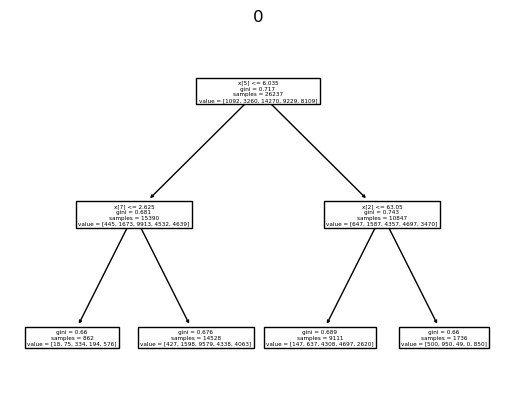

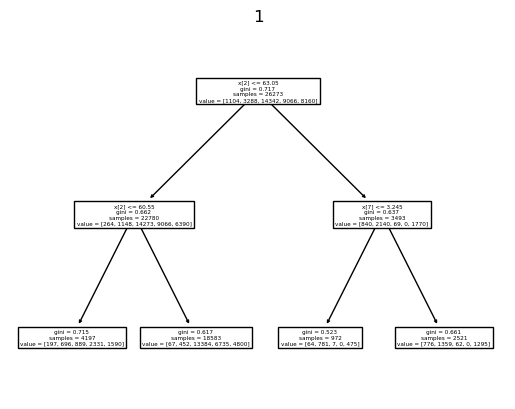

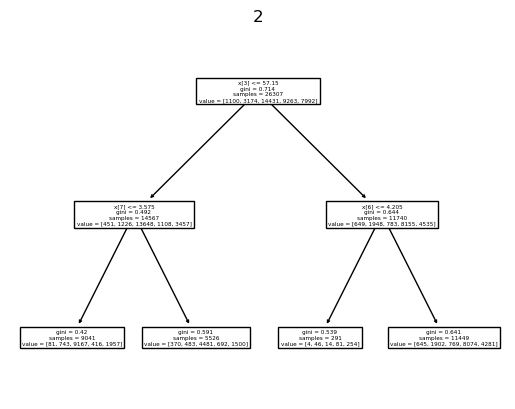

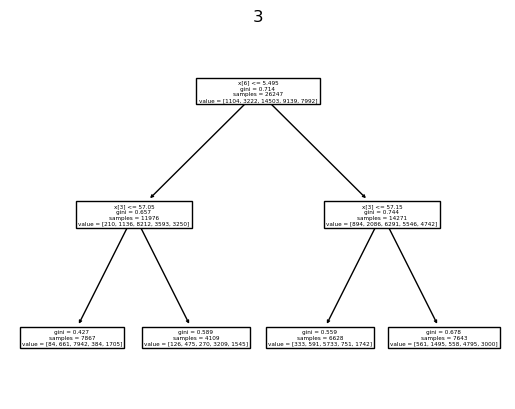

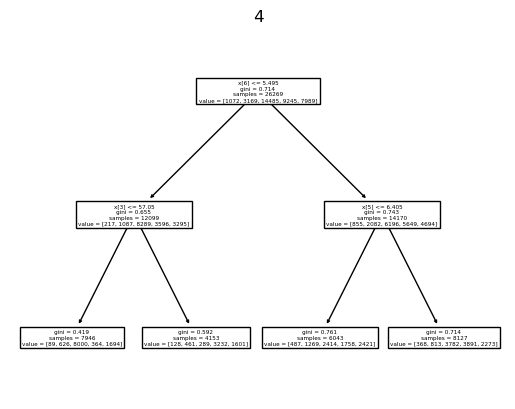

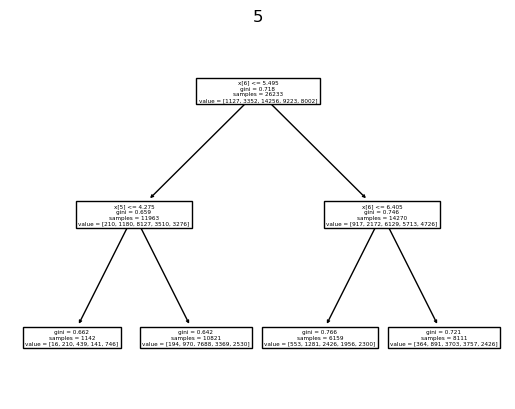

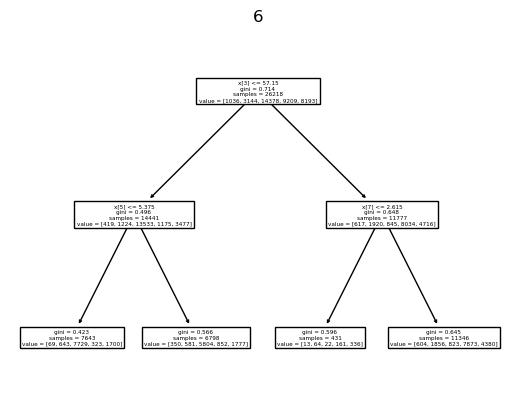

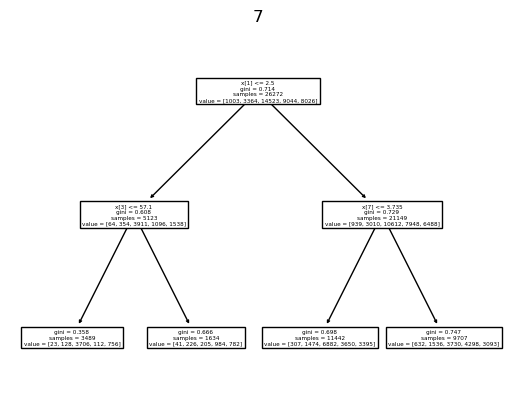

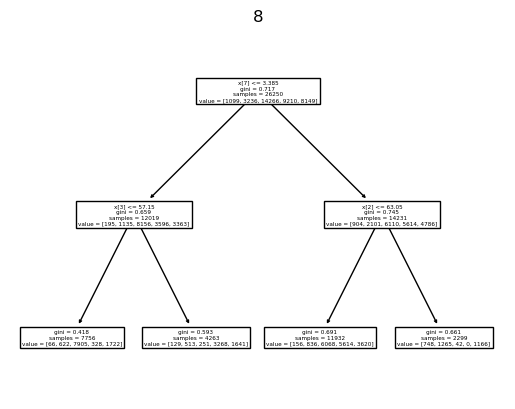

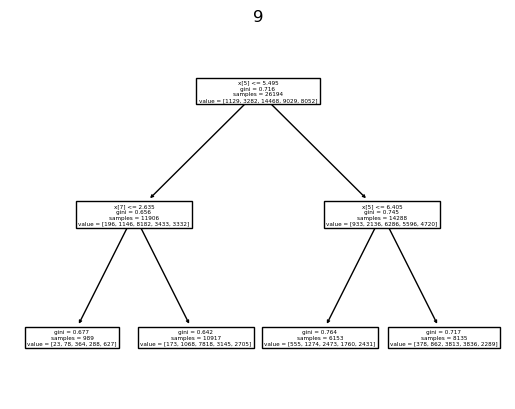

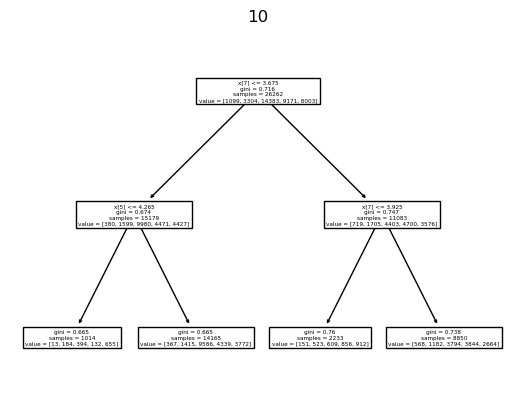

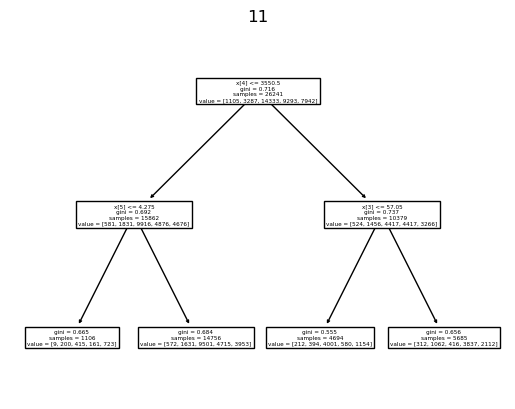

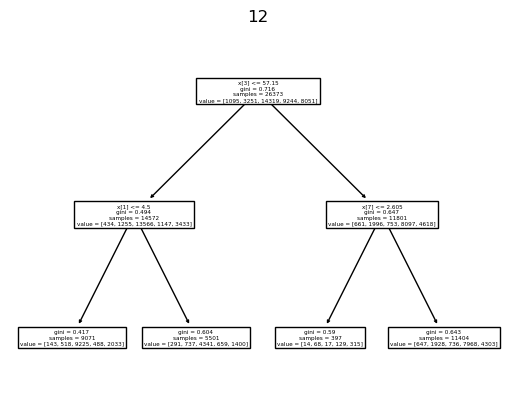

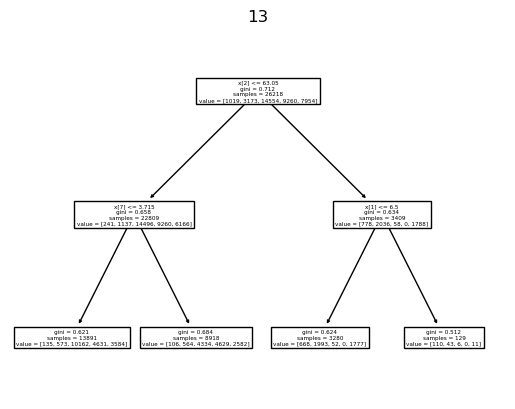

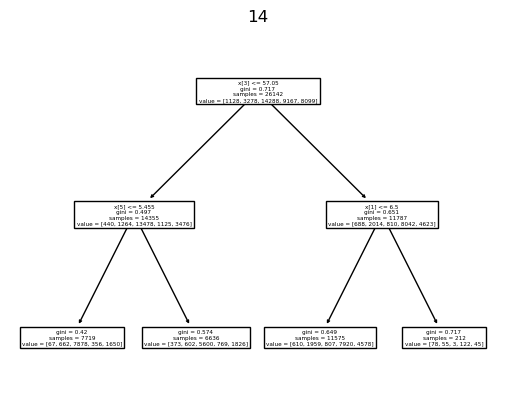

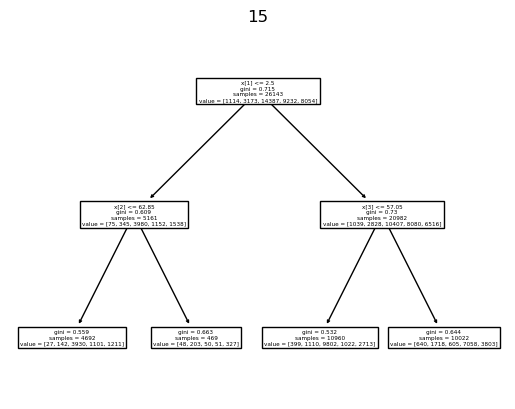

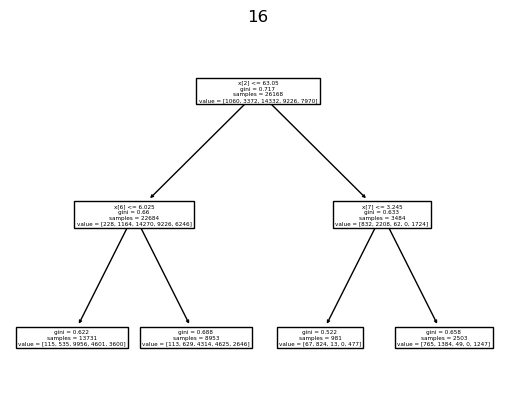

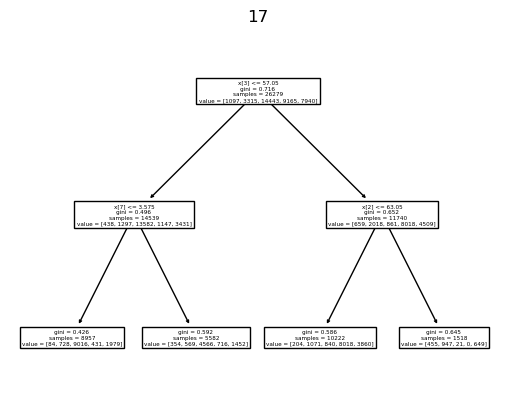

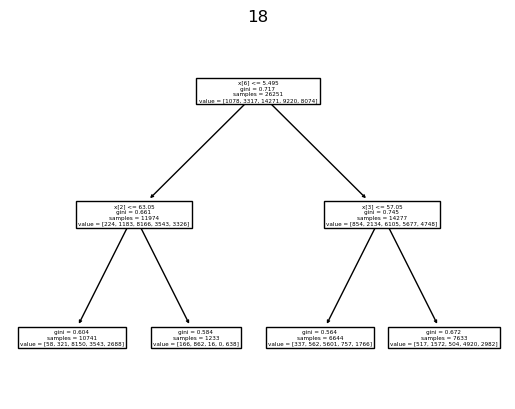

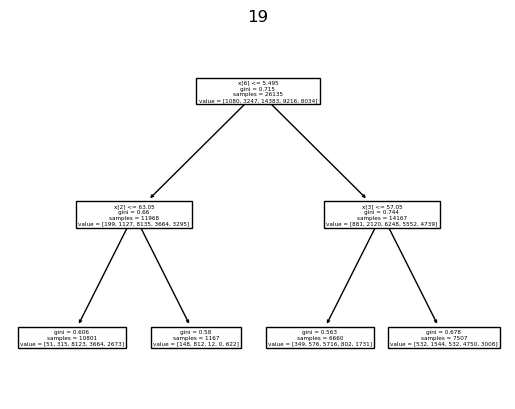

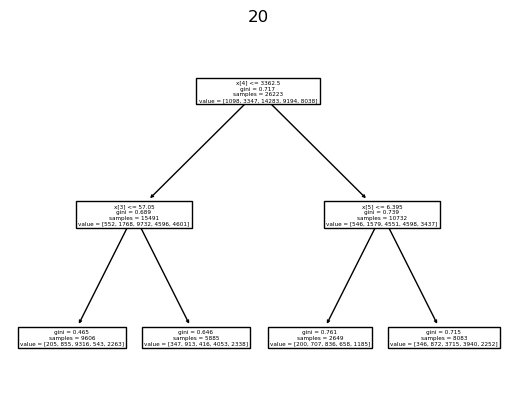

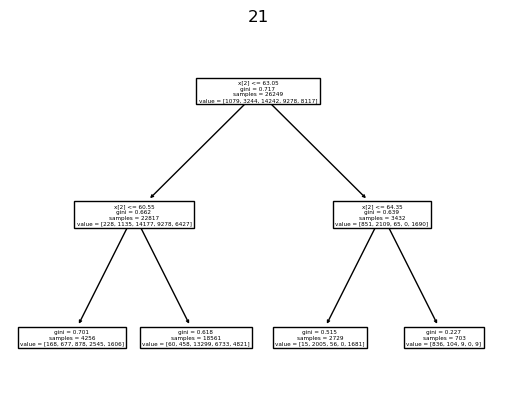

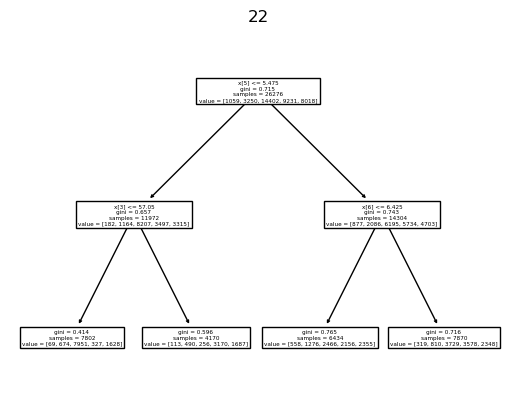

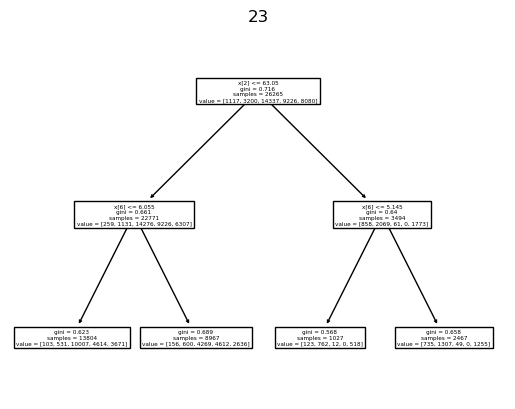

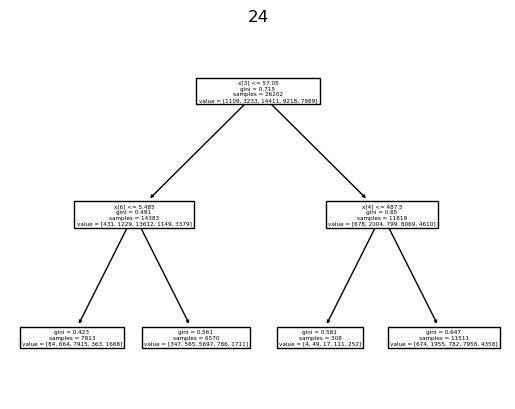

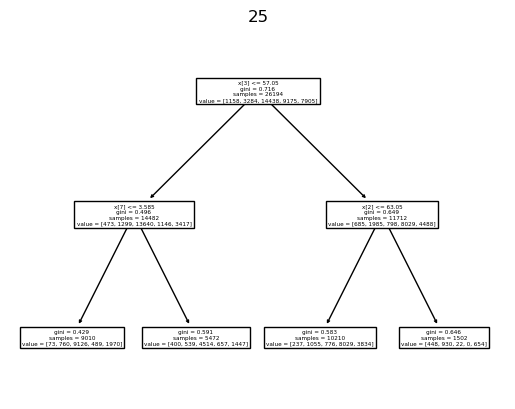

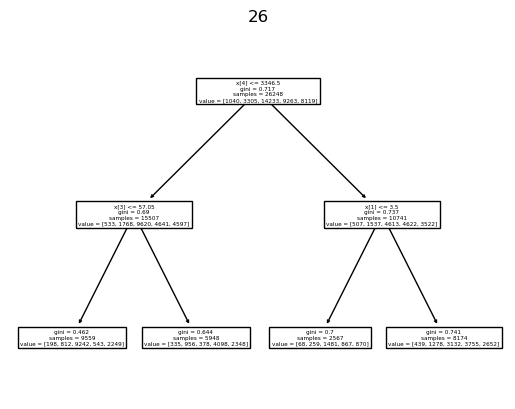

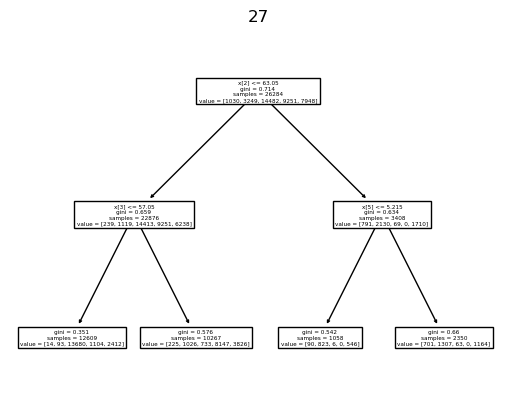

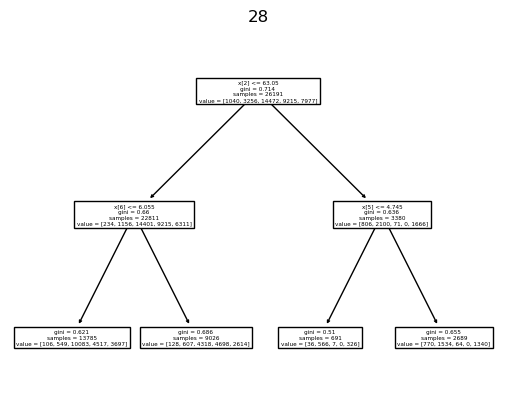

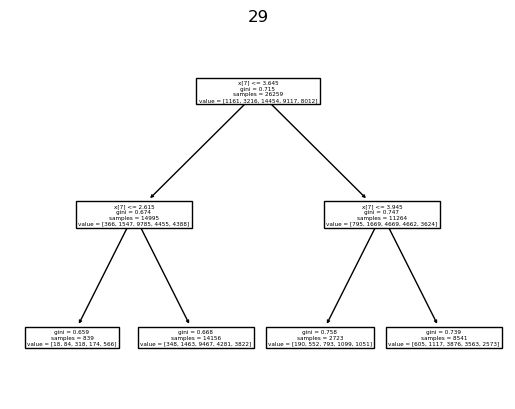

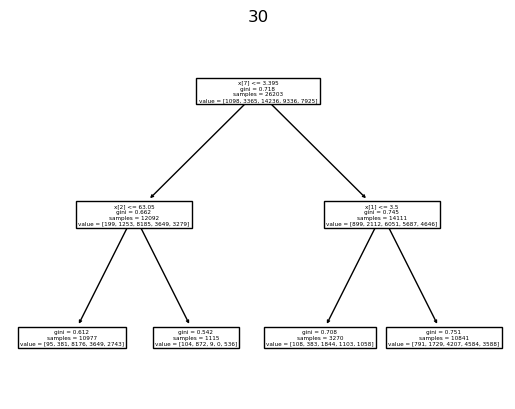

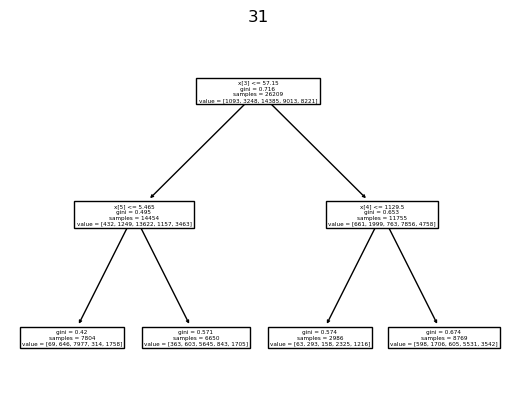

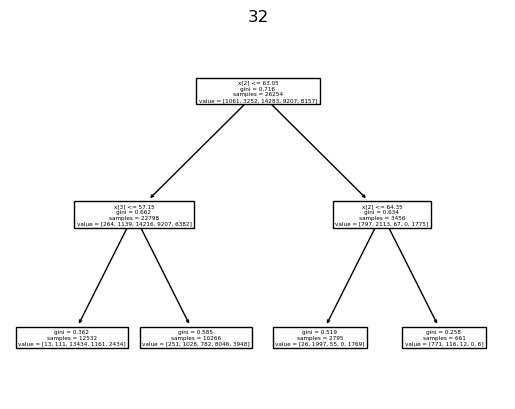

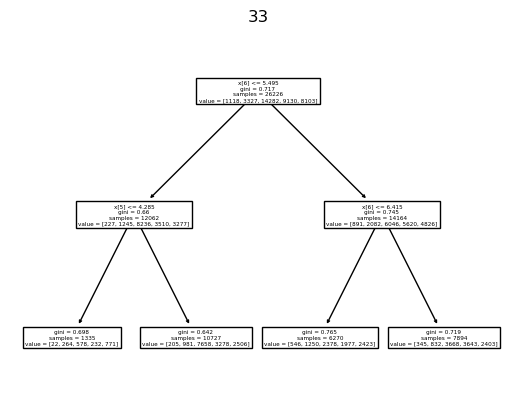

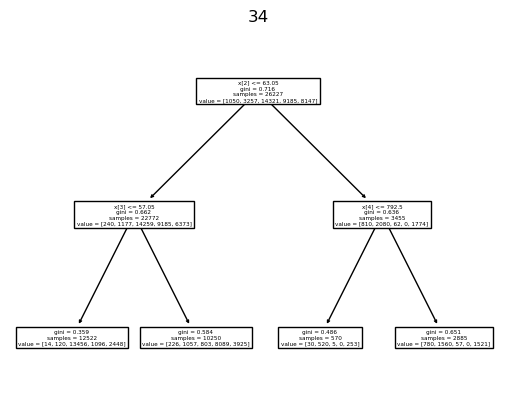

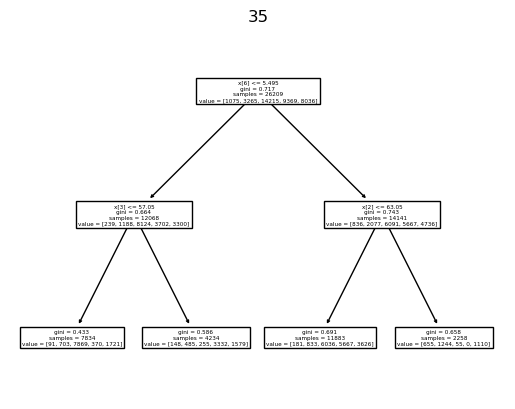

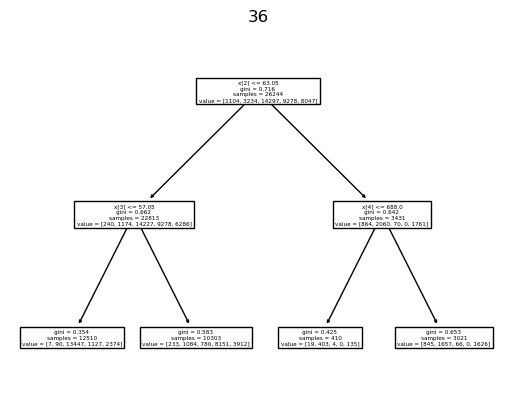

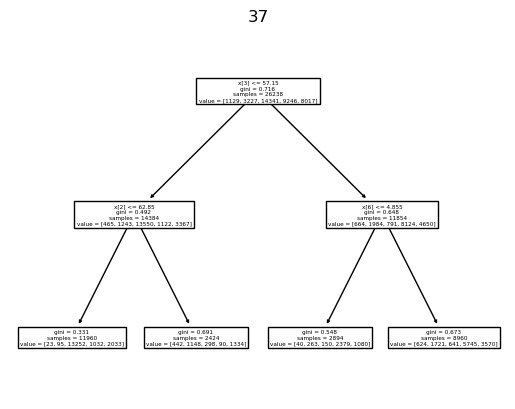

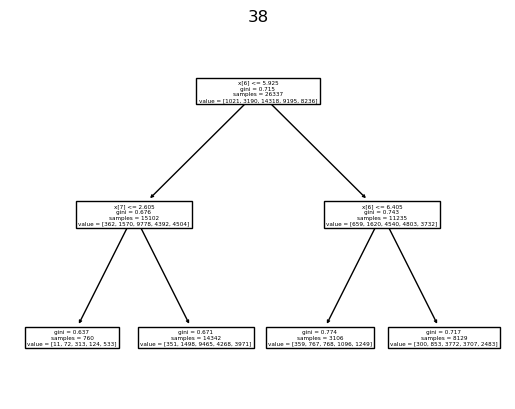

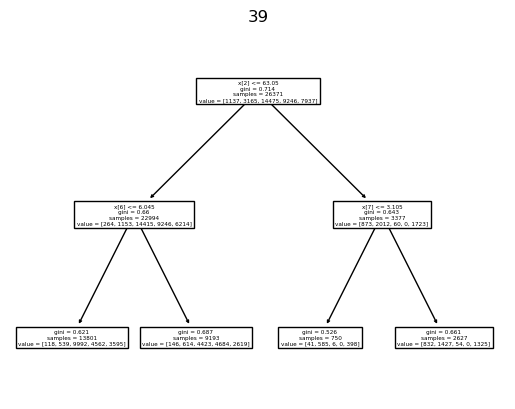

KeyboardInterrupt: 

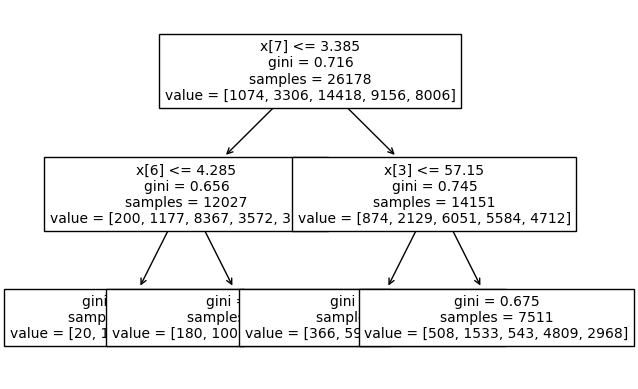

In [11]:
from sklearn import tree
for i, arbol in enumerate(random_forest.estimators_):
    tree.plot_tree(arbol)
    plt.title(i)
    plt.show()